In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('./data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [29]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [30]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [31]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [32]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [33]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [34]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [35]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [36]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

## Preprocessing

In [37]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [38]:
df['stops'] = pd.factorize(df['stops'])[0]

In [39]:
df = df.join(pd.get_dummies(df['airline'], prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city'], prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='destination').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df['arrival_time'], prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df['departure_time'], prefix='departure').astype(int)).drop('departure_time', axis=1)

In [40]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [44]:
reg.score(X_test, y_test)

0.9857666559703113

In [45]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9857666559703113
MAE:  1053.8676812322533
MSE:  7344743.953576483
RMSE:  2710.1188080186603


Text(0.5, 1.0, 'Prediction VS Actual Price')

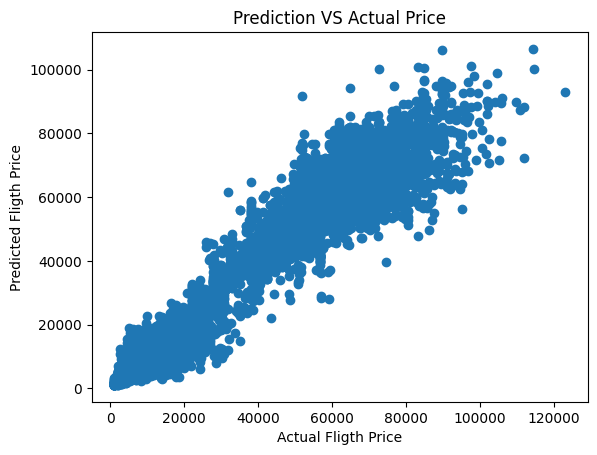

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fligth Price')
plt.ylabel('Predicted Fligth Price')
plt.title('Prediction VS Actual Price')

In [47]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [48]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', np.float64(0.8796982465464854)),
 ('duration', np.float64(0.057646644426792924)),
 ('days_left', np.float64(0.01852037008000799)),
 ('airline_Air_India', np.float64(0.005228964692757974)),
 ('airline_Vistara', np.float64(0.004611293115733185)),
 ('source_Delhi', np.float64(0.0039006334132299005)),
 ('destination_Delhi', np.float64(0.003312013586239435)),
 ('source_Mumbai', np.float64(0.002168004198223344)),
 ('destination_Mumbai', np.float64(0.0018565004255516552)),
 ('destination_Kolkata', np.float64(0.0018278632364983225)),
 ('stops', np.float64(0.0017919625895213543)),
 ('source_Kolkata', np.float64(0.0017351316011245824)),
 ('destination_Hyderabad', np.float64(0.0015741267651052607)),
 ('arrival_Evening', np.float64(0.001486926193373696)),
 ('source_Hyderabad', np.float64(0.0012549379871760267)),
 ('destination_Bangalore', np.float64(0.0012340285144358124)),
 ('departure_Evening', np.float64(0.0011551641151784217)),
 ('source_Bangalore', np.float64(0.0011481891810828243)

In [49]:
df['days_left'].describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

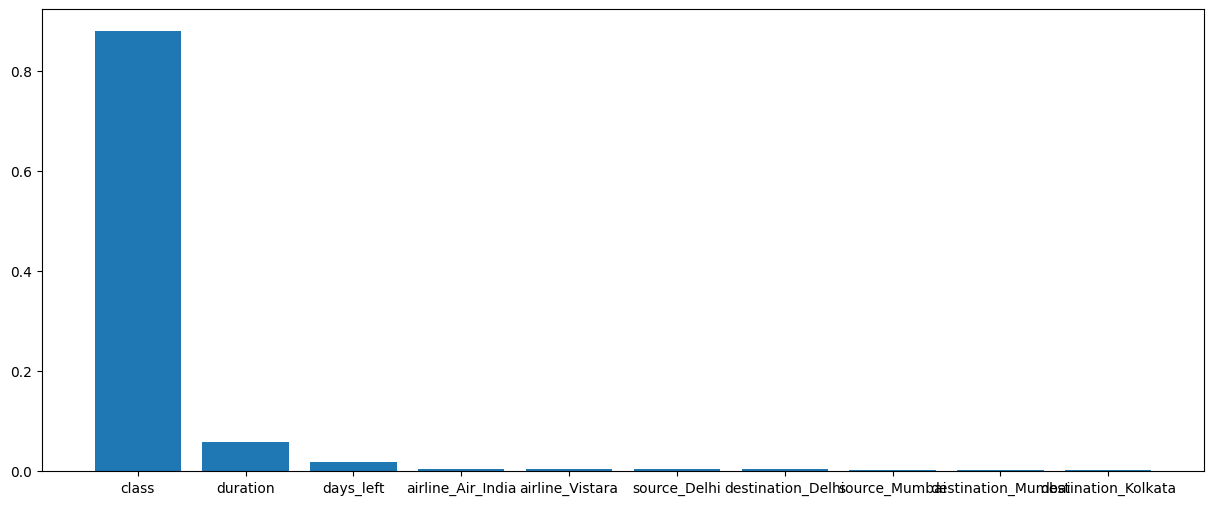

In [50]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [51]:
""" from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ """

" from sklearn.model_selection import GridSearchCV\n\nreg = RandomForestRegressor(n_jobs=-1)\n\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt']\n}\nimport math\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\n\ny_pred = reg.predict(X_test)\n\nprint('R2: ', r2_score(y_test, y_pred))\nprint('MAE: ', mean_absolute_error(y_test, y_pred))\nprint('MSE: ', mean_squared_error(y_test, y_pred))\nprint('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))\ngrid_search = GridSearchCV(reg, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_ "

In [52]:
""" from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'log2', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2,
                                   random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_ """

" from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\nparam_dist = {\n    'n_estimators': randint(100, 300),\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': randint(2, 11),\n    'min_samples_leaf': randint(1, 5),\n    'max_features': [1.0, 'log2', 'sqrt']\n}\n\nreg = RandomForestRegressor(n_jobs=-1)\n\nrandom_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,\n                                   scoring='neg_mean_squared_error', verbose=2,\n                                   random_state=10, n_jobs=-1)\n\nrandom_search.fit(X_train, y_train)\nbest_regressor = random_search.best_estimator_ "